## Python OOP Primer

Object oriented programming is a data-centered programming paradigm that is based on the idea of grouping data and operations that can be performed on data in **objects**. Formally, an object is a collection of data and associated behaviors. Think of data as the ingredients and the operations as the recipes. A **class** can be seen as a blueprint for creating objects, a template if you will. 

Objects are **instances** of a class. An object has its own set of data and behaviors.

Example: Orange class.

Data represents the individual characteristics or **attributes** of a certain object- its current state; Attributes are frequently referred to as members or properties.

Behaviors are actions that can occur on an object.
The behaviors that can be performed on a specific class of object are expressed as
the **methods** of the class.



A class is defined using the `class` keyword, and the class definition usually contains a number of class method definitions (a function in a class).

In [8]:
class Point:
 
    def reset(self):
        self.x = 0
        self.y = 0

The one difference, syntactically, between methods of classes and functions outside
classes is that methods have one required argument. This argument is conventionally
named `self`; The `self` argument to a method is a reference to the object that the method is being
invoked on.

To create a new instance of a class:

In [9]:
p1 =  Point()
p2 =  Point()

Calling method `reset()` on `p1`:

In [10]:
p1.reset()
print(p1.x, p1.y)

0 0


Notice that when we call the `p1.reset()` method, we do not explicitly pass
the `self` argument into it. It is implicitly passed by Python. It
knows we're calling a method on the `p1` object, so it automatically passes that object, `p1`,
to the method of the class, `Point`.

Adding more methods:

In [11]:
import math
class Point:
    def move(self, x, y):
        self.x = x
        self.y = y

    def reset(self):
        self.move(0, 0)

    def calculate_distance(self, other):
        return math.hypot(self.x - other.x, self.y - other.y)

In [13]:
p1 = Point()
p2 = Point()
p1.reset()
p2.move(5, 0)
p1.calculate_distance(p2)

5.0

#### Initializing the object
If we don't explicitly set the x and y positions on our Point object, either
using move or by accessing them directly, we'll have a broken Point object with no
real position.

In [14]:
p3 = Point()
p3.x

AttributeError: 'Point' object has no attribute 'x'

Most object-oriented programming languages have the concept of a constructor,
a special method that creates and initializes the object when it is created. Python
is a little different; it has a constructor and an initializer. The constructor method,
`__new__()`, is rarely used unless you're doing something very exotic. So, we'll start
our discussion with the much more common initialization method,` __init__()`.

The Python initialization method is the same as any other method, except it has a
special name, `__init__`. The leading and trailing double underscores mean this is a
special method that the Python interpreter will treat as a special case.

Let's add an initialization function on our Point class that requires the user to
supply x and y coordinates when the Point object is instantiated:

In [15]:
class Point:

    def __init__(self, x, y):
        self.move(x, y)
       

    def move(self, x, y):
        self.x = x
        self.y = y

    def reset(self):
        self.move(0, 0)

    def calculate_distance(self, other):
        return math.hypot(self.x - other.x, self.y - other.y)

Constructing a Point instance now looks like this:

In [16]:
p3 = Point(3, 4)
print(p3.x, p3.y)

Now, our Point object can never go without both x and y coordinates! If we try to
construct a Point instance without including the proper initialization parameters,
it will fail


Another special method is the `__str__` method which allows us to define how an instance of an object will be printed when it’s passed to the print() function.    

In [ ]:
class Point:

    def __init__(self, x, y):
        self.move(x, y)
       

    def move(self, x, y):
        self.x = x
        self.y = y

    def reset(self):
        self.move(0, 0)

    def calculate_distance(self, other):
        return math.hypot(self.x - other.x, self.y - other.y)

    def __str__(self):
        return(f'Point at ({self.x}, {self.y})')

**Exercise** The `Person` class that has attributes `name` and `age`, which gets set when constructing the object. Fill in the blanks so that 1) when an instance of the class is created, the attribute gets set correctly, and 2) when the `greeting()` method is called, the greeting states the assigned name.

In [3]:
class Person:
    def __init__(self, name, age):
        self.name = ___
        self.age = ____
        
    def greeting(self):
        # Should print "hi, my name is " followed by the name of the Person.
        print(___)


In [19]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age =age
        
    def greeting(self):
        # Should print "hi, my name is " followed by the name of the Person.
        print('Hi, my name is ', self.name)


 Create a new instance of `Person` with a name of your choice:

In [ ]:
some_person = ___  
# Call the greeting method
some_person.___


*Exercise*: Add a variable `gender` (a string) to the Person class and adapt the initialisation method accordingly. Also add a method `ismale()` that uses this new information and returns a boolean value (True/False).


### Inheritance 
One of the neat things you can do with classes is that you can build more specialised classes on top of more generic classes. `Person` for instance is a rather generic concept. We can use this generic class to build a more specialised class `Friend`

In [20]:
class Friend(Person):
    
    def __init__(self, name, age, ph_no):
        self.name = name
        self.age = age
        self.ph_no = ph_no
        
       

Our `Person` and `Friend` classes
have duplicate code to set up the name and age properties; this can make code
maintenance complicated.  What we really need is a way to execute the original __init__() method on
the `Person` class from inside our new class. This is what the `super()` function does; To call the initilaizer for `Person`, you can type `super().__init__()`

In [21]:
class Friend(Person):
    
    def __init__(self, name, age, ph_no):
        super().__init__(name, age)   
        self.ph_no = ph_no

In [22]:
f = Friend('a', 20, 234)

20

If you use inheritance, everything that the parent class could do, the inherited class can do as well!

In [23]:
f.greeting()

Hi, my name is  a


 We can also add new methods to `Friend` class and override `Person` methods for `Friend` class

####

#### Operator overloading
Python's operators, +, /, -, *, and so on, are implemented by special methods on
classes. We can apply Python operators more widely than the built-in numbers and
collection types. Doing this can be called "overloading" the operators: letting them
work with more than the built-in types.

#### Callable objects
It is possible to
create an object that can be called as though it were a function. Any object can be
made callable by giving it a `__call__()` method that accepts the required arguments. 
`__call__()` method allows class instances to be used as functions, but also retain state information for use during calls.

In [24]:
class StraightLine():
    def __init__(self, m, c):
        self.slope = m
        self.y_intercept = c
    def __call__(self, x):
        return self.slope * x + self.y_intercept


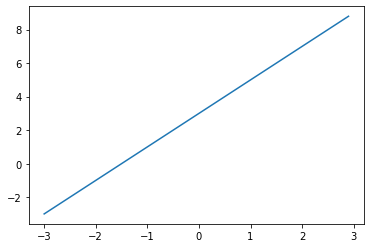

In [26]:
line = StraightLine(2, 3)

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-3, 3, 0.1)
y = line(x)
plt.plot(x, y);